Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [ ]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!git clone https://github.com/danon6868/BI-stat-course/

Cloning into 'BI-stat-course'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 43 (delta 5), reused 3 (delta 0), pack-reused 24
Unpacking objects: 100% (43/43), done.


In [ ]:
!unzip ./BI-stat-course/lecture_5_hypothesis_testing/homework/data/homework_lecture_5_data.zip

Archive:  ./BI-stat-course/lecture_5_hypothesis_testing/homework/data/homework_lecture_5_data.zip
  inflating: homework_lecture_5_data.csv  


In [ ]:
# В переменную data_path надо положить путь до данных
data_path = "./"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [ ]:
expression_data.shape

(1000, 18793)

In [ ]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

In [ ]:
b_cells_expression_data.columns

Index(['TMCC1', 'RANBP3', 'GABRG3', 'ARRDC5', 'LRP3', 'TIMM23', 'TBPL1',
       'BIRC8', 'TTC28', 'C19orf66',
       ...
       'MAGEA6', 'IL4I1', 'LCN12', 'SMG6', 'C1orf100', 'WDR75', 'ZBTB26',
       'SPTY2D1', 'PLEKHA2', 'Cell_type'],
      dtype='object', length=18793)

В обоих сабсетах у нас осталась колонка "Cell type", отрежем ее:

In [ ]:
b_cells_expression_data = b_cells_expression_data.iloc[:, :-1]
nk_cells_expression_data = nk_cells_expression_data.iloc[:, :-1]

In [ ]:
b_cells_expression_data.columns

Index(['TMCC1', 'RANBP3', 'GABRG3', 'ARRDC5', 'LRP3', 'TIMM23', 'TBPL1',
       'BIRC8', 'TTC28', 'C19orf66',
       ...
       'CFAP221', 'MAGEA6', 'IL4I1', 'LCN12', 'SMG6', 'C1orf100', 'WDR75',
       'ZBTB26', 'SPTY2D1', 'PLEKHA2'],
      dtype='object', length=18792)

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [ ]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

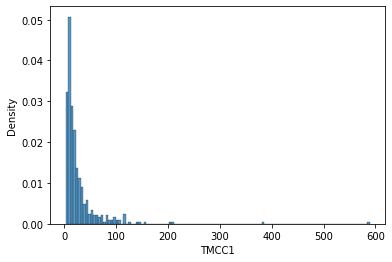

In [ ]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

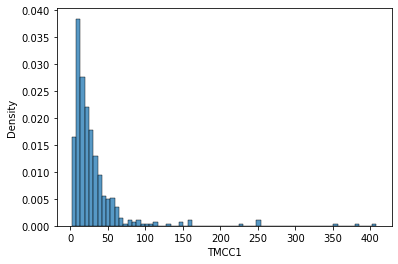

In [ ]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [ ]:
np.random.seed(13)

In [ ]:
def demonstrate_clt(expressions, sample_size, n_samples):
    means_list = []
    for i in range(n_samples):
        sample = np.random.choice(expressions, sample_size)
        means_list.append(np.mean(sample)) 

    return means_list

In [ ]:
# check using TMCC1 gene

example_gene = "TMCC1"
nk_TMCC1 = nk_cells_expression_data[example_gene]
b_TMCC1 = b_cells_expression_data[example_gene]
sample_size = 50
n_samples = 200

means_nk = demonstrate_clt(nk_TMCC1, sample_size, n_samples)
means_b = demonstrate_clt(b_TMCC1, sample_size, n_samples)

In [ ]:
means_df = pd.DataFrame(data={"Means NK cells":means_nk, "Means B-cells":means_b}, dtype=np.float64)
means_df.head(5)

,Means NK cells,Means B-cells
0,26.134431,28.481352
1,32.088474,20.616761
2,24.416137,31.362410
3,28.280109,24.478880
4,31.421472,26.343919


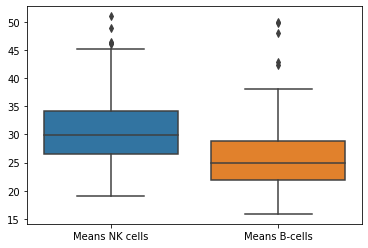

In [ ]:
sns.boxplot(data=means_df);

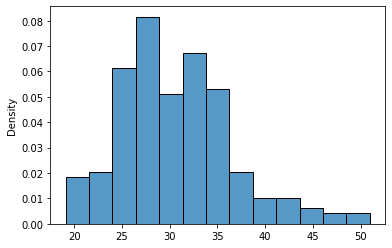

In [ ]:
sns.histplot(means_nk, stat="density");

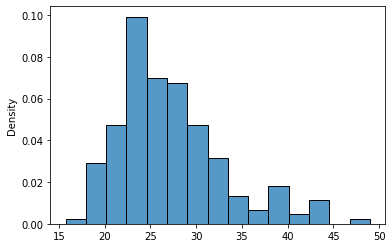

In [ ]:
sns.histplot(means_b, stat="density");

По графикам с выбранными n_samples = 200 и sample_size = 50 мы не можем говорить о существенной разницей между nk-клетками и b-клетками.

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [ ]:
def CI_95(data, mean_means):
    se = np.std(data) / np.sqrt(len(data))
    CI_lower = mean_means - 1.96 * se
    CI_upper = mean_means + 1.96 * se
    return (CI_lower, CI_upper)

CI_b = CI_95(b_cells_expression_data[example_gene], np.mean(means_b))
CI_nk = CI_95(nk_cells_expression_data[example_gene], np.mean(means_nk))

print(f"The confidence interval for B-cells is: {CI_b}")
print(f"The confidence interval for NK-cells is: {CI_nk}")


The confidence interval for B-cells is: (22.524714241358293, 29.617877313461715)
The confidence interval for NK-cells is: (27.060979156629312, 34.206991958290686)


## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [ ]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [ ]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [ ]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [ ]:
def check_intervals_intersect(first_ci, second_ci):
    first_ci = sorted(first_ci)
    second_ci = sorted(second_ci)
    if (second_ci[0] <= first_ci[1] <= second_ci[1]) or (first_ci[0] <= second_ci[1] <= first_ci[1]):
        return True
    else:
        return False

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [63]:
def stat_ci(data, gene, alpha=0.95):
    # NK клетки
    ci = st.t.interval(alpha,
              df=len(data[gene]) - 1,
              loc=np.mean(data[gene]),
              scale=st.sem(data[gene])) 
    return ci
        
common_genes = set(nk_cells_expression_data.columns).intersection(set(b_cells_expression_data))
ci_test_results = [check_intervals_intersect(stat_ci(nk_cells_expression_data, gene), 
                                             stat_ci(b_cells_expression_data, gene)) for gene in common_genes]
ci_test_results[1:20] # true if CIs are intersecting

[True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True]

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [64]:
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression
    common_genes = set(first_table.columns).intersection(set(second_table))
    ci_test_results = dict()
    for gene in common_genes:
        # if intervals intersect --> difference is not significant
        if check_intervals_intersect(stat_ci(first_table, gene), stat_ci(second_table, gene)):
            ci_test_results[gene] = False
        else:
            ci_test_results[gene] = True
    return ci_test_results


In [65]:
nk_b = check_dge_with_ci(nk_cells_expression_data, b_cells_expression_data)

In [66]:
{k: nk_b[k] for k in list(nk_b)[:10]}

{'MFAP4': False,
 'C1orf168': False,
 'CXCR6': True,
 'ANO7': False,
 'SLC16A2': False,
 'AK8': False,
 'NEK1': False,
 'PITHD1': True,
 'RTKN': False,
 'SLC35F1': False}

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
# Наш излюбленный ген
z_stat, p_val = ztest(b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene])
p_val

0.17935507499860204

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [ ]:
nk_cells_expression_data.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
b_cells_expression_data.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression
    alpha = 0.05
    common_genes = set(first_table.columns).intersection(set(second_table))
    z_test_results = dict()
    for gene in common_genes:
        z_stat, p_val = ztest(first_table[gene], second_table[gene])
        z_test_results[gene] = p_val < alpha
    return z_test_results

In [ ]:
nk_b_ztest = check_dge_with_ztest(nk_cells_expression_data, b_cells_expression_data)
{k: nk_b_ztest[k] for k in list(nk_b_ztest)[:10]}

{'MFAP4': False,
 'C1orf168': False,
 'CXCR6': True,
 'ANO7': False,
 'SLC16A2': False,
 'AK8': False,
 'NEK1': False,
 'PITHD1': True,
 'RTKN': False,
 'SLC35F1': False}

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]

# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]

# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [67]:
def dd():
    return 3, 2

In [69]:
a, b = dd()
a

3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import scipy.stats as st


def demonstrate_clt(expressions):
    sample_size = len(expressions) // 5  # changable
    n_samples = 1000  # changable
    means_list = []
    for i in range(n_samples):
        sample = np.random.choice(expressions, sample_size)
        means_list.append(np.mean(sample))

    return means_list


def hist(data, gene, id):
    plt.figure()
    graph_histogram = sns.histplot(data[gene], stat="density")
    graph_histogram = graph_histogram.get_figure()
    graph_histogram.savefig(f"{gene}_type{id}_histogram.png")


def boxplot(data1, data2, gene):
    means1_gene = demonstrate_clt(data1[gene])
    means2_gene = demonstrate_clt(data2[gene])
    means_df = pd.DataFrame(data={"Means first type": means1_gene, "Means second type": means2_gene}, dtype=np.float64)
    graph_boxplot = sns.boxplot(data=means_df)
    fig3 = graph_boxplot.get_figure()
    fig3.savefig(f"{gene}_boxplot_means.png")


def plots(de_first, de_second, gene):
    # histograms for the gene expression levels distribution
    hist(de_first, gene, id=1)
    hist(de_second, gene, id=2)

    # boxplot for the means comparing two given datasets
    boxplot(de_first, de_second, gene)


def stat_ci(data, gene, alpha=0.95):
    # NK клетки
    ci = st.t.interval(alpha,
                       df=len(data[gene]) - 1,
                       loc=np.mean(data[gene]),
                       scale=st.sem(data[gene]))
    return ci


def check_intervals_intersect(first_ci, second_ci):
    first_ci = sorted(first_ci)
    second_ci = sorted(second_ci)
    if (second_ci[0] <= first_ci[1] <= second_ci[1]) or (first_ci[0] <= second_ci[1] <= first_ci[1]):
        return True
    else:
        return False


def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression
    common_genes = set(first_table.columns).intersection(set(second_table))
    ci_test_results = dict()
    for gene in common_genes:
        # if intervals intersect --> difference is not significant
        if check_intervals_intersect(stat_ci(first_table, gene), stat_ci(second_table, gene)):
            ci_test_results[gene] = False
        else:
            ci_test_results[gene] = True
    return ci_test_results


def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression
    alpha = 0.05
    common_genes = set(first_table.columns).intersection(set(second_table))
    z_test_results = []
    p_values = []
    for gene in common_genes:
        z_stat, p_val = ztest(first_table[gene], second_table[gene])
        p_values.append(p_val)
        z_test_results.append(p_val < alpha)
    return z_test_results, p_values


if __name__ == '__main__':
    first_cell_type_expressions_path = input("Enter the path to the type-1 data: ")
    second_cell_type_expressions_path = input("Enter the path to the type-2 data: ")
    save_results_table = input("How to name the output file? ")
    # downloading the data
    first_expr = pd.read_csv(first_cell_type_expressions_path, index_col=0)
    second_expr = pd.read_csv(second_cell_type_expressions_path, index_col=0)

    # filling na with means if there are any
    if first_expr.isnull().values.any():
        first_expr.fillna(first_expr, inplace=True)
    if second_expr.isnull().values.any():
        second_expr.fillna(second_expr, inplace=True)

    # plotting
    to_plot_bool = input("Do you want to view a plot histograms and a plot for means of some genes? (y/n) ")
    if to_plot_bool == "y":
        genes = input("Enter names of the genes (a, b, c): ").split(", ")
        for gene in genes:
            plots(first_expr, second_expr, gene)
        print("Check the current folder for the plots!")

    # confidencse intervals check
    ci_test_results = check_dge_with_ci(first_expr, second_expr)

    # z-test check
    z_test_results, z_test_p_values = check_dge_with_ztest(first_expr, second_expr)

    # difference of means
    mean_diff = first_expr.mean(axis=0) - second_expr.mean(axis=0)

    results = {
        "ci_test_results": ci_test_results,
        "z_test_results": z_test_results,
        "z_test_p_values": z_test_p_values,
        "mean_diff": mean_diff}

    results_df = pd.DataFrame(results)
    results_df.to_csv(f"{save_results_table}.csv")
    print(f"Thank you for the patience, you can find your results in the {save_results_table}.csv file!")



## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)